
# Exercici 1

Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv. Considera si el vol ha arribat tard o no (ArrDelay > 0).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
# Load the dataframe
df=pd.read_csv ("data/DelayedFlights.csv")
#Remove the column ' Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
# fill 0 if we don´t have data
df[['DepDelay',"ArrDelay"]]=df[['DepDelay',"ArrDelay"]].fillna(0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


I added new column: Delay - (yes/no). There is not delay if delay is <16 minuts. 

In [4]:
#df.dropna(inplace=True)
df["newArrDelay"]=df["ArrDelay"].apply(lambda x: 0 if x<16 else 1)
df["newArrDelay"].unique()

array([0, 1], dtype=int64)

In [5]:
df["newArrDelay"].value_counts()

1    1215012
0     721746
Name: newArrDelay, dtype: int64

**Decision Tree**

In [6]:
#split dataset in features and target variable
feature_cols = ['DepDelay', 'DepTime','Distance']
X = df[feature_cols] # Features
y = df.newArrDelay # Target variable
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [7]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [8]:
tree_accuracy=metrics.accuracy_score(y_test, y_pred_tree)
tree_accuracy

0.8345449788994679

**K Nearest Neighbor(KNN)**

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred_KN = classifier.predict(X_test)
y_pred_KN 

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

**Logistic Regression**

In [12]:
#df["newArrDelay"]=df["ArrDelay"].apply(lambda x: 0 if x<1 else 1)
#df["newArrDelay"].unique()

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression


#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred_lr=logreg.predict(X_test)

In [14]:
y_pred_lr

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

# Exercici 2

Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confiança i d’altres mètriques més avançades.

**Decision Tree**

In [15]:
tree_accuracy=metrics.accuracy_score(y_test, y_pred_tree)
tree_accuracy

0.8345449788994679

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[176846  39597]
 [ 56537 308048]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79    216443
           1       0.89      0.84      0.87    364585

    accuracy                           0.83    581028
   macro avg       0.82      0.83      0.83    581028
weighted avg       0.84      0.83      0.84    581028



**K Nearest Neighbor(KNN)**

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KN,  labels=[0,1]))
print(classification_report(y_test, y_pred_KN, labels=[0,1]))

[[169242  47201]
 [ 59236 305349]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76    216443
           1       0.87      0.84      0.85    364585

    accuracy                           0.82    581028
   macro avg       0.80      0.81      0.81    581028
weighted avg       0.82      0.82      0.82    581028



In [18]:
kn_accuracy=metrics.accuracy_score(y_test, y_pred_KN)
kn_accuracy

0.8168126148825874

In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_KN))
print(classification_report(y_test, y_pred_KN))

[[169242  47201]
 [ 59236 305349]]
              precision    recall  f1-score   support

           0       0.74      0.78      0.76    216443
           1       0.87      0.84      0.85    364585

    accuracy                           0.82    581028
   macro avg       0.80      0.81      0.81    581028
weighted avg       0.82      0.82      0.82    581028



**Logistic Regression**

In [20]:
lr_accuracy=metrics.accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.8359011958115615

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[180956  35487]
 [ 59859 304726]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79    216443
           1       0.90      0.84      0.86    364585

    accuracy                           0.84    581028
   macro avg       0.82      0.84      0.83    581028
weighted avg       0.84      0.84      0.84    581028



# - Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

In [22]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))    

Text(0, 0.5, 'Mean Error')

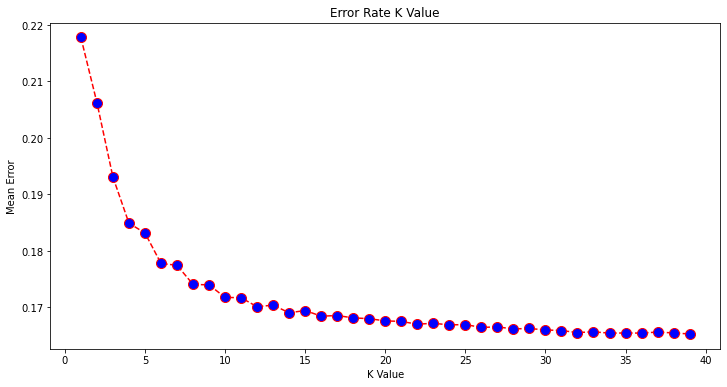

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [24]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)
y_pred_KN_9 = classifier.predict(X_test)
y_pred_KN_9

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [25]:
kn_9_accuracy=metrics.accuracy_score(y_test, y_pred_KN_9)
kn_9_accuracy

0.82600322187571

a little bit better....

# - Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o cross-validation.



In [26]:
from sklearn.model_selection import cross_val_score

# Aplicación de validación cruzada de cinco partes

scores_tree_ac = cross_val_score(clf, X, y, cv = 5, scoring='accuracy')
scores_tree_recall = cross_val_score(clf, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_tree_ac))
print('Cross-validation scores:{}'.format(scores_tree_recall))

Cross-validation scores:[0.83134978 0.83037134 0.838346   0.84623507 0.82818168]
Cross-validation scores:[0.84288195 0.83511726 0.84584141 0.85765138 0.84123587]


In [27]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_tree_ac.mean(), scores_tree_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_tree_recall.mean(), scores_tree_recall.std()))

0.83 accuracy with a standard deviation of 0.01
0.84 recall with a standard deviation of 0.01


In [28]:
scores_KN_ac = cross_val_score(classifier, X, y, cv = 5, scoring='accuracy')
scores_KN_recall = cross_val_score(classifier, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_KN_ac))
print('Cross-validation scores:{}'.format(scores_KN_recall))

Cross-validation scores:[0.81922644 0.81883145 0.82738956 0.83125641 0.8141892 ]
Cross-validation scores:[0.83248698 0.82247956 0.8366728  0.84472144 0.83026066]


In [29]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_KN_ac.mean(), scores_KN_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_KN_recall.mean(), scores_KN_recall.std()))

0.82 accuracy with a standard deviation of 0.01
0.83 recall with a standard deviation of 0.01


In [30]:
scores_LR_ac = cross_val_score(logreg, X, y, cv = 5, scoring='accuracy')
scores_LR_recall = cross_val_score(logreg, X, y, cv = 5, scoring='recall')
print('Cross-validation scores:{}'.format(scores_LR_ac))
print('Cross-validation scores:{}'.format(scores_LR_recall))

Cross-validation scores:[0.83315434 0.83133687 0.8391618  0.84728838 0.82951122]
Cross-validation scores:[0.83464745 0.82348778 0.83552055 0.84764323 0.83345816]


In [31]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_LR_ac.mean(), scores_LR_ac.std()))
print("%0.2f recall with a standard deviation of %0.2f" % (scores_LR_recall.mean(), scores_LR_recall.std()))

0.84 accuracy with a standard deviation of 0.01
0.83 recall with a standard deviation of 0.01


# Nivell 2

- Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

In [32]:
df_plus=df[['DepDelay', 'DepTime','Distance','CancellationCode', 'TailNum', 'Origin','Dest','UniqueCarrier','newArrDelay']]
df_plus

,DepDelay,DepTime,Distance,CancellationCode,TailNum,Origin,Dest,UniqueCarrier,newArrDelay
0,8.0,2003.0,810,N,N712SW,IAD,TPA,WN,0
1,19.0,754.0,810,N,N772SW,IAD,TPA,WN,0
2,8.0,628.0,515,N,N428WN,IND,BWI,WN,0
3,34.0,1829.0,515,N,N464WN,IND,BWI,WN,1
4,25.0,1940.0,688,N,N726SW,IND,JAX,WN,0
...,...,...,...,...,...,...,...,...,...
1936753,30.0,1250.0,906,N,N938DL,MSP,ATL,DL,1
1936754,57.0,657.0,481,N,N3743H,RIC,ATL,DL,1
1936755,80.0,1007.0,689,N,N909DA,ATL,IAH,DL,1
1936756,11.0,1251.0,533,N,N646DL,IAD,ATL,DL,0


In [33]:
#Creating Dummy Variables
dummy=pd.get_dummies(df_plus[['CancellationCode', 'UniqueCarrier']])
dummy.head()

,CancellationCode_A,CancellationCode_B,CancellationCode_C,CancellationCode_N,UniqueCarrier_9E,UniqueCarrier_AA,UniqueCarrier_AQ,UniqueCarrier_AS,UniqueCarrier_B6,UniqueCarrier_CO,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
df_plus=pd.concat([df_plus,dummy],axis=1)
df_plus.head()

,DepDelay,DepTime,Distance,CancellationCode,TailNum,Origin,Dest,UniqueCarrier,newArrDelay,CancellationCode_A,...,UniqueCarrier_HA,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
0,8.0,2003.0,810,N,N712SW,IAD,TPA,WN,0,0,...,0,0,0,0,0,0,0,1,0,0
1,19.0,754.0,810,N,N772SW,IAD,TPA,WN,0,0,...,0,0,0,0,0,0,0,1,0,0
2,8.0,628.0,515,N,N428WN,IND,BWI,WN,0,0,...,0,0,0,0,0,0,0,1,0,0
3,34.0,1829.0,515,N,N464WN,IND,BWI,WN,1,0,...,0,0,0,0,0,0,0,1,0,0
4,25.0,1940.0,688,N,N726SW,IND,JAX,WN,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
feature_colsEng = ['DepDelay', 'DepTime','Distance',
       'UniqueCarrier_9E', 'UniqueCarrier_AA', 'UniqueCarrier_AQ',
       'UniqueCarrier_AS', 'UniqueCarrier_B6', 'UniqueCarrier_CO',
       'UniqueCarrier_DL', 'UniqueCarrier_EV', 'UniqueCarrier_F9',
       'UniqueCarrier_FL', 'UniqueCarrier_HA', 'UniqueCarrier_MQ',
       'UniqueCarrier_NW', 'UniqueCarrier_OH', 'UniqueCarrier_OO',
       'UniqueCarrier_UA', 'UniqueCarrier_US', 'UniqueCarrier_WN',
       'UniqueCarrier_XE', 'UniqueCarrier_YV']
X_plus = df_plus[feature_colsEng] # Features
y_plus = df_plus.newArrDelay # Target variable
X_train_plus, X_test_plus, y_train_plus, y_test_plus = train_test_split(X_plus, y_plus, random_state=0, test_size=0.3)

**Logistic Regression**

In [36]:
# instantiate the model (using the default parameters)
logreg_plus = LogisticRegression()

# fit the model with data
logreg_plus.fit(X_train_plus,y_train_plus)

#
y_pred_lr_plus=logreg_plus.predict(X_test_plus)

In [37]:
y_pred_lr_plus

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

**K Nearest Neighbor(KNN)**

In [55]:
classifier_plus = KNeighborsClassifier(n_neighbors=5)
classifier_plus.fit(X_train_plus, y_train_plus)

KNeighborsClassifier()

In [56]:
y_pred_KN_plus = classifier_plus.predict(X_test_plus)
y_pred_KN_plus 

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

**XGBOOST**

In [57]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train_plus, y_train_plus)

c:\users\natas\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [58]:
# make predictions for test data
y_pred_xgboost = model.predict(X_test_plus)
y_pred_xgboost

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [60]:
from sklearn.metrics import roc_auc_score
print("Logistic Regression - ", roc_auc_score(y_test_plus, y_pred_lr_plus))
print("K Nearest Neighbor(KNN) - ", roc_auc_score(y_test_plus, y_pred_KN_plus))
print("y_pred_xgboost - ", roc_auc_score(y_test_plus, y_pred_xgboost))

Logistic Regression -  0.8367168087548548
K Nearest Neighbor(KNN) -  0.8134291991127497
y_pred_xgboost -  0.8403115571941412


# Nivell 3

- Exercici 6

No utilitzis la variable DepDelay a l’hora de fer prediccions

In [49]:
#split dataset in features and target variable
feature_cols = ['DepTime','Distance']
X = df[feature_cols] # Features
y = df.newArrDelay # Target variable
# Split dataset into training set and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

**Decision Tree without DepDelay**

In [50]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(max_depth=5).fit(X_train3,y_train3)
#Predict the response for test dataset
y_pred_tree3 = clf.predict(X_test3)
y_pred_tree3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [51]:
tree_accuracy3=metrics.accuracy_score(y_test3, y_pred_tree3)
tree_accuracy3

0.6316700744198214

**KNN without DepDelay**

In [52]:
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train3, y_train3)
y_pred_KN_9_3 = classifier.predict(X_test3)
y_pred_KN_9_3

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [42]:
kn3_9_accuracy=metrics.accuracy_score(y_test3, y_pred_KN_9_3)
kn3_9_accuracy

0.6492406562162236

**Logistic Regression without DepDelay**

In [43]:
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train3,y_train3)
y_pred_lr3=logreg.predict(X_test3)
y_pred_lr3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [44]:
lr_accuracy3=metrics.accuracy_score(y_test3, y_pred_lr3)
lr_accuracy3

0.622477746339247